# Aula 11 Visualização de Dados



## Matplotlib

### Setup

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# load datasets
line_data = pd.read_csv('2020-monthly-avg-temps-f.csv')
bar_data = pd.read_csv('plant_data_simplified.csv')
scatter_data = pd.read_csv('spotify_data_by_genres.csv')
pie_data = pd.read_csv('EV_market_share.csv')
hist_data = pd.read_csv('lobster_dist.csv')

In [21]:
# display charts correctly
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['figure.dpi'] = 100

### Gráfico de linhas

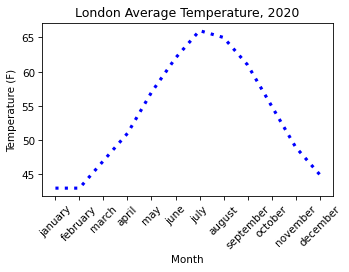

In [6]:
plt.plot(line_data.month_name, line_data.london_avg, color='blue', linewidth='3', dashes=(1,2), label='London')
plt.title('London Average Temperature, 2020')
plt.ylabel('Temperature (F)')
plt.xlabel('Month')
plt.tick_params(axis='x', labelrotation=45)
plt.show()

### Gráfico de Barras

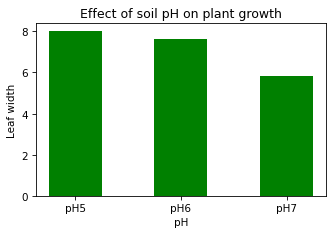

In [8]:
plt.bar(bar_data.PH, bar_data.average_leaf_width, color='green', width=0.5)
plt.title('Effect of soil pH on plant growth')
plt.ylabel('Leaf width')
plt.xlabel('pH')
plt.show()

### Gráfico de pizza

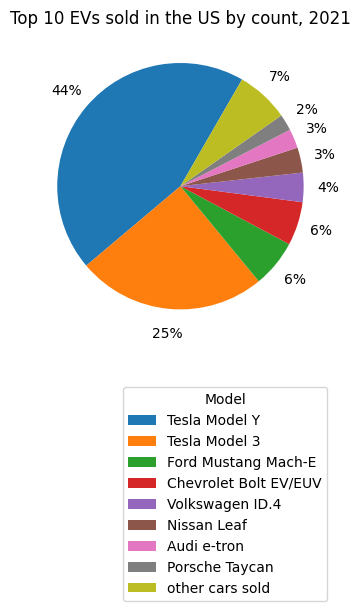

In [28]:
plt.pie(pie_data.number_sold, startangle=60, autopct='%1.0f%%', pctdistance=1.2)
plt.legend(pie_data.model, bbox_to_anchor=(1,-0.5),title='Model', title_fontsize=10, loc='center right')
plt.title('Top 10 EVs sold in the US by count, 2021')
plt.show()

### Gráfico de dispersão

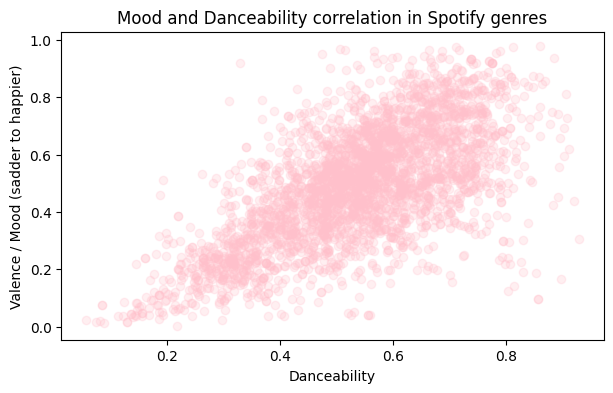

In [31]:
plt.scatter(scatter_data.danceability, scatter_data.valence, color='pink', alpha=0.25)
plt.title('Mood and Danceability correlation in Spotify genres')
plt.ylabel('Valence / Mood (sadder to happier)')
plt.xlabel('Danceability')
plt.show()

### Histograma

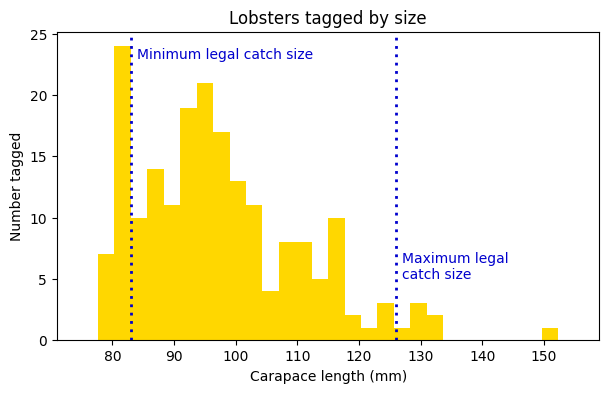

In [35]:
plt.hist(hist_data.carapace_length, bins=30, range=(75,155), color='gold')
plt.title('Lobsters tagged by size')
plt.ylabel('Number tagged')
plt.xlabel('Carapace length (mm)')
plt.axline((83, 0), (83, 1), linewidth=2, dashes=(1,2), color='mediumblue')
plt.axline((126, 0), (126, 1), linewidth=2, dashes=(1,2), color='mediumblue')
plt.annotate('Minimum legal catch size', (84, 23), color='mediumblue')
plt.annotate('Maximum legal \ncatch size', (127, 5), color='mediumblue')
plt.show()

## Seaborn

### Comparação

In [10]:
import matplotlib
import seaborn as sns

# datasets
plants_wide = pd.read_csv('plants_wide.csv')
plants_long = pd.read_csv('plants_long.csv')

In [11]:
plants_wide.head()

,Time,Plant_height_1,Plant_height_2,Plant_height_3,Plant_height_4,Plant_height_5
0,0,22.0,16.5,16.5,13.5,12.0
1,11,30.0,25.0,22.0,17.5,17.0
2,21,40.0,42.0,30.5,28.0,24.0
3,28,45.0,50.0,36.0,35.0,26.0
4,35,50.0,60.0,41.0,41.0,32.0


Os dados do dataset de formato longo possuem uma coluna para cada um dos conjuntos de alturas de plantas. Veja o gráfico produzido pelo matplotlib.

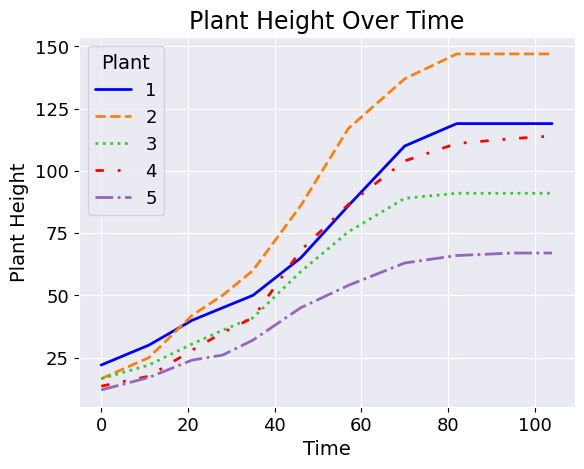

In [12]:
# formatting parameters
matplotlib.rcParams.update(
                          {'font.size': 13,
                           'axes.facecolor': '#EAEAF2',
                           'axes.edgecolor': 'white',
                           'axes.grid': True,
                           'figure.facecolor': 'white',
                           'grid.color': 'white',
                           'grid.linestyle': '-',
                           'lines.solid_capstyle': 'round'
                          })

# code for each line
plt.plot(plants_wide.Time, plants_wide.Plant_height_1, color='blue', linestyle='-', linewidth=2, label='1')
plt.plot(plants_wide.Time, plants_wide.Plant_height_2, color='tab:orange', linestyle='--', linewidth=2, label='2')
plt.plot(plants_wide.Time, plants_wide.Plant_height_3, color='limegreen', linestyle=':', linewidth=2, label='3')
plt.plot(plants_wide.Time, plants_wide.Plant_height_4, color='red', linestyle=(0, (3, 5, 1, 5)), linewidth=2, label='4')
plt.plot(plants_wide.Time, plants_wide.Plant_height_5, color='tab:purple', linestyle='-.', linewidth=2, label='5')


# titles and labels
plt.title('Plant Height Over Time', fontsize=17)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Plant Height', fontsize=14)
plt.yticks([25,50,75,100,125,150])
plt.legend(title = 'Plant', title_fontsize=14)

plt.show()

Dê uma olhada no dataset de formato longo, com os mesmos dados de plantas. Veja como é mais fácil usar seaborn.

In [13]:
plants_long.head()

,Time,Plant,Plant_height
0,0,1,22.0
1,0,2,16.5
2,0,3,16.5
3,0,4,13.5
4,0,5,12.0


O formato longo armazena a altura de todas as plantas numa coluna e os números dos conjuntos em outra coluna. Veja agora o mesmo gráfico criado com seaborn usando as configurações prévias: 

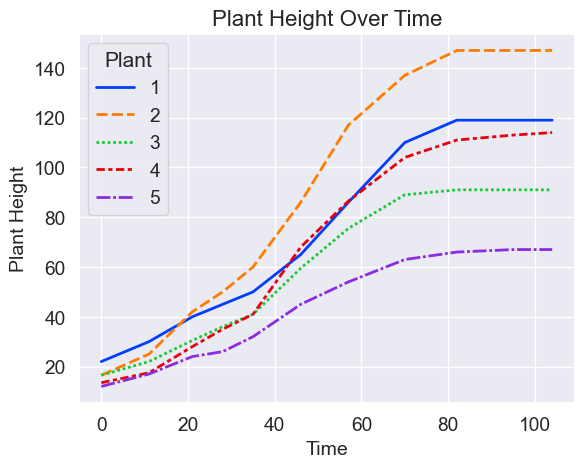

In [14]:
# set seaborn style theme
sns.set_theme(style="darkgrid", font_scale=1.25)

# code for plot with all lines
p = sns.lineplot(data=plants_long, x='Time', y='Plant_height', hue='Plant', style='Plant', linewidth=2, palette='bright')

# titles and labels
p.set_xlabel('Time', fontsize=14)
p.set_ylabel('Plant Height', fontsize=14)
p.set_title('Plant Height Over Time', fontsize=16)

plt.show()

### Setup

In [15]:
import numpy as np
fires = pd.read_csv('fires.csv')
waste = pd.read_csv('waste.csv')
plants = pd.read_csv('plants.csv')

### Gráfico de Linhas 

Um gráfico de linhas mostra mudanças contínuas e é frequentemente usado para medir mudanças ao longo do tempo. O gráfico a seguir mostra o número médio de incêndios na Amazônia de 1999 a 2019.

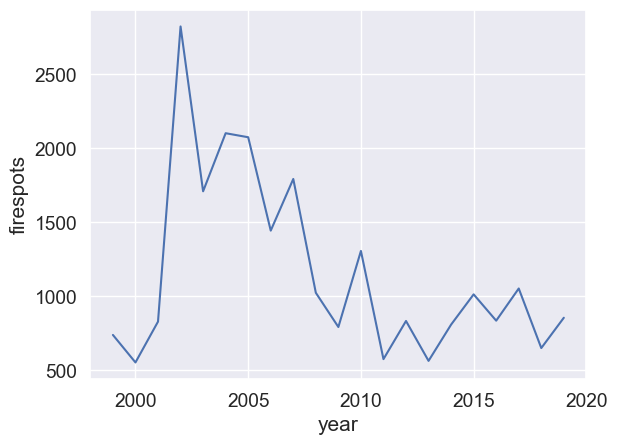

In [17]:
sns.lineplot(data=fires, x='year', y='firespots', errorbar=None)
plt.show()

### Gráfico de Barras

Um gráfico de barras usa a altura da barra para comparar uma medida entre variáveis ​​categóricas. O gráfico seguinte mostra uma comparação do PIB médio per capita para países com diferentes níveis de rendimento.

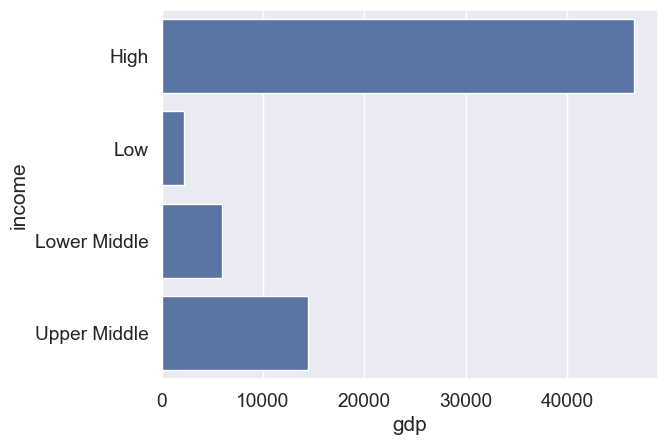

In [18]:
sns.barplot(data=waste, x='gdp', y='income', errorbar=None)
plt.show()

### Gráfico de Dispersão

Um gráfico de dispersão usa a posição para mostrar a relação, ou correlação, entre duas variáveis ​​numéricas. O gráfico a seguir mostra a relação entre resíduos de vidro e plástico. Cada ponto representa dados de resíduos para um país individual.

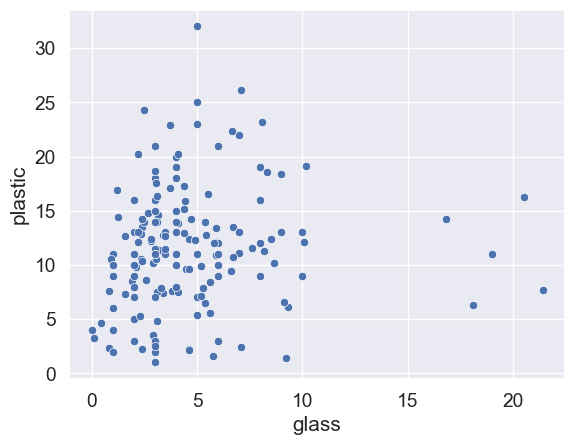

In [19]:
sns.scatterplot(data=waste, x='glass', y='plastic')
plt.show()

### Histograma

Um histograma mostra como um tipo de dados é distribuído. O histograma a seguir mostra uma distribuição dos comprimentos das folhas.

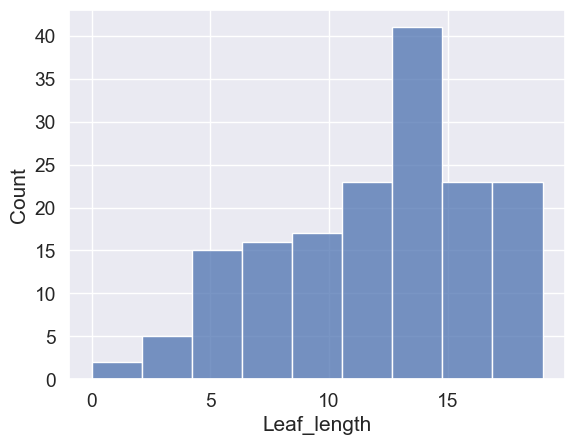

In [20]:
sns.histplot(data=plants, x='Leaf_length')
plt.show()

### Outros Gráficos

#### KDE

Um gráfico de estimativa de densidade do kernel (KDE) mostra uma distribuição como um histograma, mas com linhas suavizadas. O gráfico a seguir mostra uma distribuição suavizada das larguras das folhas.

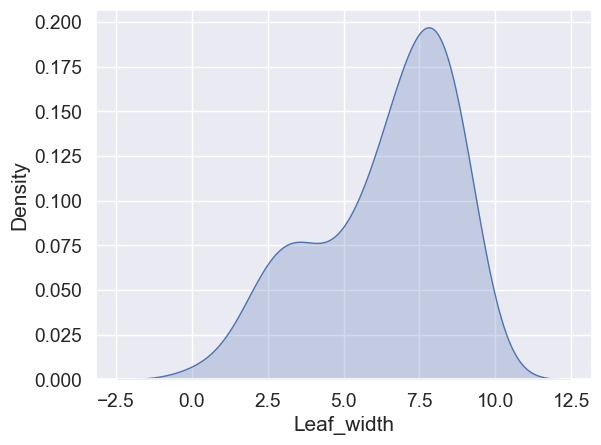

In [21]:
sns.kdeplot(data=plants, x='Leaf_width', fill=True)
plt.show()

#### Box plot

Um box plot mostra informações específicas sobre uma distribuição, como mediana e valores discrepantes. O gráfico de caixa a seguir mostra distribuições de alturas de plantas em diferentes níveis de PH.

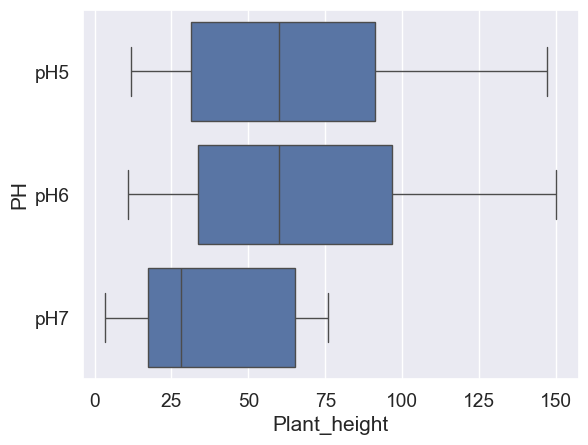

In [22]:
sns.boxplot(data=plants, x='Plant_height', y='PH')
plt.show()